In [ ]:
# Aug 5th_online shopping

In [ ]:
(1)Clustering- grouping the customer--- buying pattern
Recency,Frequency,Monetary.
(2)Identify the business trend-- day,month,season,timing...
(3)Recommendation engine-- 
(4)Life time valuation of the customer..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data=pd.read_excel("Online_shopping.xlsx")

In [4]:
df=original_data.copy()
df.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


(1)Clustering- grouping the customer--- buying pattern
Recency,Frequency,Monetary.

In [8]:
#df["Country"].value_counts(normalize=True)

In [ ]:
# to solve the first problem statement -- only keep the reqiored columns

In [9]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [10]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [11]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [ ]:
# we can not retrieve the cust_id if the cumtomer is not willing to disclose

In [12]:
df1.dropna(axis=0,inplace=True)

In [13]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
# the quantity is -ve --> Refund / defective item

In [ ]:
# unit price 0 ---> free item

In [15]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [16]:
df1=df1[df1["Quantity"]>0]

In [17]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
df1.head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


In [ ]:
# lets create a total price column-- qty* unit ptice

In [20]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [21]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
# we can drop unit ptice and qty col becoz we have created a total colume

In [22]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [24]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [ ]:
# groupby function will summerize the duplicate invoice no. and sum the total value

In [25]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [26]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
# recency --> dataset last date - customer last purchase
# frequency --> no. of time new invoice has generated w.r.to a customer
# Monetary--> total of sum with r.to cust id

In [ ]:
#lets work on datetime data type

In [27]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
# as per the dataset the business date is Dec 9th 2011

In [28]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [ ]:
# approximately we have one year of dataset

In [ ]:
# lets set the bench mark of last business date as +1 day extra ..ie 10 Dec 2011

In [29]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
# recency --> dataset last date - customer last purchase
# frequency --> no. of time new invoice has generated w.r.to a customer
# Monetary--> total of sum with r.to cust id

In [30]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
# to calculate the R,F,M with respect to Customer ID

In [35]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [32]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
# Rename the columns as per calculation we made

In [36]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [37]:
RFM_score.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12347.0,2,7,4310.0


In [ ]:
# we can assign the rank( marking scheme) -- using the rank function

In [38]:
RFM_score["R_rank"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["F_rank"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_rank"]=RFM_score["Monetary"].rank(ascending=True)

In [39]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
# lets calculate the percentile marks

In [40]:
RFM=RFM_score.copy()

In [41]:
RFM["R_final"]=(RFM["R_rank"]/RFM["R_rank"].max())*100
RFM["F_final"]=(RFM["F_rank"]/RFM["F_rank"].max())*100
RFM["M_final"]=(RFM["M_rank"]/RFM["M_rank"].max())*100

In [44]:
#RFM.head()

In [43]:
RFM=RFM.round(2)

In [45]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35


In [ ]:
#final sum of R F M marks

In [46]:
RFM["RFM_SUM"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [47]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387


In [ ]:
# loyality categories--silver,gold,diamond,platinum

In [48]:
quant100=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])
quant100

0.25    27.7225
0.50    48.7810
0.75    71.4875
Name: RFM_SUM, dtype: float64

In [49]:
quant200=RFM["RFM_SUM"].quantile(q=[0.20,0.60,0.80])
quant200

0.2    24.0874
0.6    57.8362
0.8    76.0636
Name: RFM_SUM, dtype: float64

In [ ]:
# visualization--emperical cumulative distribution function--- SEABORN

<Axes: xlabel='RFM_SUM', ylabel='Proportion'>

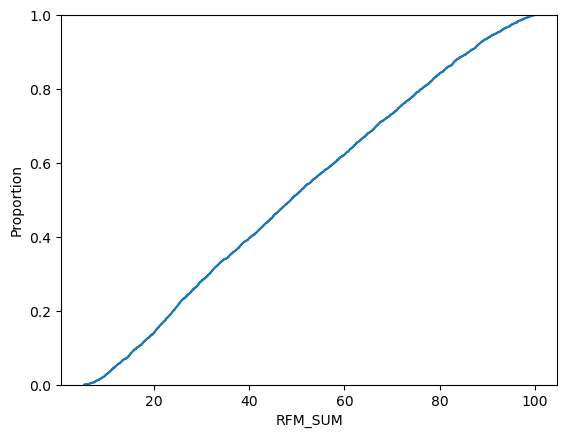

In [50]:
sns.ecdfplot(data=RFM["RFM_SUM"])

In [51]:
min(RFM["RFM_SUM"])

5.371999999999999

In [ ]:
# LETS ASSIGN THE LOYALITY -- AS PER PERCENTILE

In [52]:
def loyality(x):
    if x<=25:
        return "Silver"
    elif x<=55:
        return "Gold"
    elif x<=77:
        return "Diamond"
    else:
        return "Platinum"
    

In [53]:
# use the above function
RFM["Loyality"]=RFM["RFM_SUM"].apply(loyality)

In [54]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,Silver


In [55]:
RFM["Loyality"].value_counts()

Gold        1552
Diamond     1029
Silver       928
Platinum     830
Name: Loyality, dtype: int64

In [ ]:
# we can do the clustering --- use of algorithm also--- KMEANS Clustering

In [56]:
Newdata=RFM["RFM_SUM"]
Newdata.head(2)

0    55.807
1    91.021
Name: RFM_SUM, dtype: float64

In [57]:
Newdata=pd.DataFrame(Newdata)

In [58]:
Newdata.head(2)

,RFM_SUM
0,55.807
1,91.021


In [59]:
from sklearn.cluster import KMeans

In [61]:
kmeans1=KMeans(max_iter=200,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)
y_means

array([1, 3, 1, ..., 2, 3, 1])

In [63]:
RFM["Cluster"]=kmeans1.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond,1
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum,3
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond,1
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond,1
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,Silver,0


In [64]:
RFM["Cluster"].value_counts()

0    1235
2    1122
1    1030
3     952
Name: Cluster, dtype: int64

In [65]:
RFM["Loyality"].value_counts()

Gold        1552
Diamond     1029
Silver       928
Platinum     830
Name: Loyality, dtype: int64